# Numerical Optimization

In [1]:
import math
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

The *optimization* problem is to find maxima and minima of an *objective function*. Optimization is often referred to as *minimization*, because maximization can be formulated as minimizing its negative value. 

Optimization is closely related to root finding: because at the minima the slope (or first derivative) of the curve is zero for smooth functions. In general, optimization algorithms only finds local extrema.

## Univariate optimization

Let's first look at how to find the minima of a simple function of a single variable:

In [13]:
def f(x):
    """The target function"""
    return x**4 + 4 * x**3 + (x - 2) ** 2


def dfdx(x):
    """The slope or first derivative of f"""
    return 4 * x**3 + 12 * x**2 + 2 * (x - 2)


def d2fdx2(x):
    """The curvature or second derivative of f"""
    return 12 * x**2 + 24 * x + 2

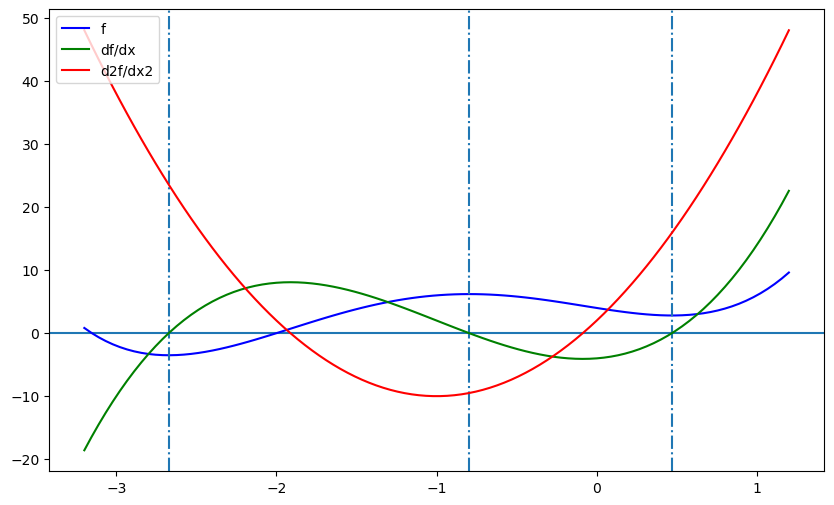

In [3]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
x = np.linspace(-3.2, 1.2, 100)
ax.axhline(0)
ax.plot(x, f(x), "-b", label="f")
ax.axvline(-0.796635786203095, linestyle="-.")
ax.axvline(0.469617434058037, linestyle="-.")
ax.axvline(-2.67298164785494, linestyle="-.")
ax.plot(x, dfdx(x), "-g", label="df/dx")
ax.plot(x, d2fdx2(x), "-r", label="d2f/dx2")
ax.legend(loc="upper left")
plt.show()

At a minimum the value of the function must increase if we move left or right --- i.e., 

* The minima are at *critical points* where the slope of the curve, or its first derivative, is zero.
* There must be positive curvature (or the second derivative $\frac{d^2f}{dx^2} > 0$).

At a maximimum, the slope again must be zero, but there must be negative curvature (since the function must decrease if we move left or right)

For simple problems, like the above, this can be solved analytically.

If we are solving for an extremum or critical point by solving $\frac{df}{dx}=0$ we can look at the curvature (second derivative) to see what sort of critical point we have found.
* $\frac{d^2f}{dx^2}<0 \ \ \implies \ \ $ maximum
* $\frac{d^2f}{dx^2}=0 \ \ \implies \ \ $ inflection
* $\frac{d^2f}{dx^2}>0 \ \ \implies \ \ $ minimum

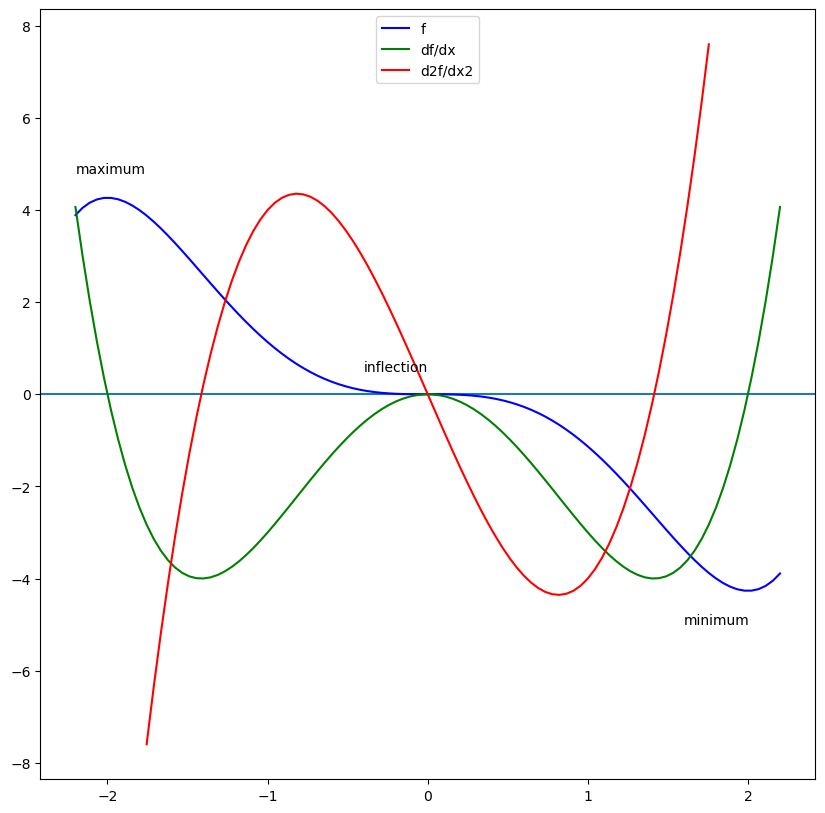

In [4]:
def ff(x):
    return x**5 / 5 - 4 * x**3 / 3


def dff(x):
    return x**2 * (x - 2) * (x + 2)


def d2ff(x):
    return 4 * x**3 - 8 * x


fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.axhline(0)
x = np.linspace(-2.2, 2.2, 100)
ax.plot(x, ff(x), "-b", label="f")
ax.plot(x, dff(x), "-g", label="df/dx")
ax.plot(x[10:-10], d2ff(x[10:-10]), "-r", label="d2f/dx2")
ax.annotate("maximum", xy=(-2.2, 4.8))
ax.annotate("inflection", xy=(-0.4, 0.5))
ax.annotate("minimum", xy=(1.6, -5.0))

ax.legend(loc="upper center")
plt.show()

In [5]:
import sympy

sympy.init_printing()

In [6]:
x = sympy.Symbol("x")
objfunc = x**4 + 4 * x**3 + (x - 2) ** 2
objfunc

In [7]:
objfunc.diff(x)

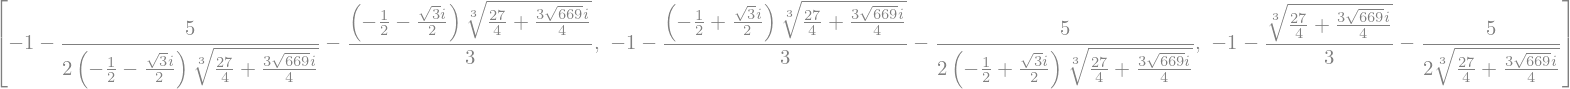

In [8]:
sols = sympy.solve(objfunc.diff(x), x)
sols

In [9]:
sols[0].evalf()

In [10]:
sols[0].evalf(chop=True)

In [ ]:
sols[1].evalf(chop=True)

In [ ]:
sols[2].evalf(chop=True)

In [ ]:
objfunc.diff(x, 2).evalf(subs={x: sols[0]}, chop=True)

In [ ]:
objfunc.diff(x, 2).evalf(subs={x: sols[1]}, chop=True)

In [ ]:
objfunc.diff(x, 2).evalf(subs={x: sols[2]}, chop=True)


### Numerical solution

Since most problems cannot be solved symbolically we must usually use numerical computing.

We can use various functions in `scipy.optimize` to find a minimum (or more precisely, to find a critical point).

For univariate problems, the main function is `scipy.optimize.fminbound`, which finds the minimum within an interval.

Limiting the interval searched for a minimum is usually very important
* many functions behave badly outside a certain range
* your problem usually dictates that you want solutions only within a certain physically meaningful range
* especially in many dimensions optimization is hard and the more you tell the optimizer the greater your chance of success

In [11]:
import scipy.optimize as optimize

In [12]:
optimize.fminbound?

Signature:
optimize.fminbound(
    func,
    x1,
    x2,
    args=(),
    xtol=1e-05,
    maxfun=500,
    full_output=0,
    disp=1,
)
Docstring:
Bounded minimization for scalar functions.

Parameters
----------
func : callable f(x,*args)
    Objective function to be minimized (must accept and return scalars).
x1, x2 : float or array scalar
    Finite optimization bounds.
args : tuple, optional
    Extra arguments passed to function.
xtol : float, optional
    The convergence tolerance.
maxfun : int, optional
    Maximum number of function evaluations allowed.
full_output : bool, optional
    If True, return optional outputs.
disp : int, optional
    If non-zero, print messages.
        0 : no message printing.
        1 : non-convergence notification messages only.
        2 : print a message on convergence too.
        3 : print iteration results.


Returns
-------
xopt : ndarray
    Parameters (over given interval) which minimize the
    objective function.
fval : number
    (Option

In [14]:
optimize.fminbound(f, -4, -2)

In [15]:
optimize.fminbound(f, 0, 2)

In [18]:
def negf(x):
    return -f(x)


optimize.fminbound(negf, -2, 0)

Alternatively, we could use `scipy.optimize.minimize_scalar` for automatic bracketing.

In [ ]:
results = optimize.minimize_scalar(f)
print(results)
results.x

However, automatic bracketing is not fool proof. For example,

In [ ]:
def f(r):
    return 2 * np.pi * r**2 + 2 / r


r = np.linspace(1.0e-20, 2, 100)
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(r, f(r), lw=2, color="b")
ax.set_title(r"$f(r) = 2\pi r^2+2/r$", fontsize=18)
ax.set_xlabel(r"$r$", fontsize=18)
ax.set_xticks([0, 0.5, 1, 1.5, 2])
ax.set_ylim(0, 30)
fig.tight_layout()
plt.show()

In [ ]:
try:
    x = optimize.minimize_scalar(f)
except Exception as e:
    print(e)

In [ ]:
output = optimize.minimize_scalar(f, bracket=(0.1, 4))
output.x

**Example:** How far to run? 

\[units of distance and time are meters and seconds respectively\]

You are on a beach (at coordinate $(0,0)$) and have to get *as fast as possible* to an island (at $(X,Y)$) that is distance $X$ along the beach and distance $Y$ into the ocean.  You run at speed $r$ and swim more slowly at speed $s$.  

*Question:* How far ($x$) should you run before you start swimming?  This is an optimization problem --- chose $x$ to minimize the travel time.

Pythagoras's theorem tells us the distance being swum is $\sqrt{(X-x)^2+Y^2}$, so the total time taken is
$$
t(x) = \frac{x}{r} + \frac{\sqrt{(X-x)^2+Y^2}}{s}
$$
I.e., the travel time is a function of $x$ and you need to find the value of $x$ that minimizes $t$.

Below, I show how to use Sympy to compute the analytic solution

Please
* use Scipy to compute a numerical solution for the values given below, and
* numerically evaluate the expression from Sympy and compare the two solutions.

Use these values for the numerical calculation
```
X=100
Y=30
r=3
s=1
```

In [ ]:
import math

X = 100
Y = 30
r = 3
s = 1


def t(x):
    return x / r + np.sqrt((X - x) ** 2 + Y**2) / s


print(optimize.fminbound(t, 0, X))

xs = np.linspace(0, X, 20)
ts = t(xs)

In [ ]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
fig1 = plt.figure()
fig1.set_size_inches(10,8)
ax1 = fig1.add_subplot(111)
ax1.axis("off")
ax1.text(-10, -2, "Start\n(0,0)")
ax1.text(102, 28, "Island\n(X,Y)")
ocean = patches.Rectangle((0,0), 100, 40, facecolor="lightblue", linewidth=0)
beach = patches.Rectangle((0,-20), 100, 20, facecolor="yellow", linewidth=0)
ax1.add_patch(beach); ax1.text(20, -10, "Beach")
ax1.add_patch(ocean); ax1.text(20, 20, "Ocean")
ax1.annotate(text='', xy=(0,0), xytext=(100,0), arrowprops=dict(arrowstyle='<->',linestyle="--"))
ax1.text(50, -5, "X")
ax1.annotate(text='', xy=(100,0), xytext=(100,30), arrowprops=dict(arrowstyle='<->',linestyle="--"))
ax1.text(100, 15, "Y")
ax1.annotate(text='', xy=(0,2), xytext=(70,2), arrowprops=dict(arrowstyle='<->'))
ax1.text(35, 3, "x")
ax1.annotate(text='', xy=(70,2), xytext=(100,30), arrowprops=dict(arrowstyle='<->'))
ax1.text(60, 15, r"$\sqrt{(X-x)^2+Y^2}$")
ax1.plot([0, 100], [0,30], linestyle='none', marker='o');
plt.show()

In [ ]:
import sympy

sympy.init_printing()
X, Y, r, s, x = sympy.symbols("X, Y, r, s, x")
t = x / r + sympy.sqrt((X - x) ** 2 + Y**2) / s
t

In [ ]:
t.diff(x)

In [ ]:
sols = sympy.solve(t.diff(x), x)
sols

We want the first solution (in `sols[0]`) since we must have $0\le x \le X$ and note all quantities are positive.

In [ ]:
sols[0].evalf(subs={X: 100, Y: 30, r: 3, s: 1})

## Under the hood

### Golden section search

The golden-section search for minimization is analogous to the bisection method for root finding. It starts with an interval with opposite signs of slopes, and repeatedly shrinks the interval until the length of interval is within some tolerance.

![Golden section](golden_section.png "Golden section")

![Golden section shrunk](golden_section_shrink.png "Golden section shrunk")

The following code implements the method.

In [ ]:
def golden_section(f, a, b, tol):
    """
    finds a minimum of f(x) within the interval [a,b] using the
    golden-section search. It assumes f has negative slope
    at a and positive slope at b.
    """

    tau = (np.sqrt(5) - 1) / 2  # golden ratio
    x1 = a + (1 - tau) * (b - a)
    x2 = a + tau * (b - a)
    f1, f2 = f(x1), f(x2)

    k = 0
    while b - a > tol:
        if f1 > f2:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + tau * (b - a)
            f2 = f(x2)
        else:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + (1 - tau) * (b - a)
            f1 = f(x1)

        k = k + 1

    x = (a + b) / 2

    return x, k

In [ ]:
x, k = golden_section(f, 0.1, 4, 1.0e-12)
x

In [ ]:
(np.sqrt(5) - 1) / 2

### Successive Parabolic Interpolation

Successive parabolic interpolation for minimization is analogous to the secant method to root finding. It uses three points to construct a quadratic interpolation.

<img src=parabolic_interp.png width="400">
It converges faster than golden_section search. 

The following code illustrates the idea:

In [ ]:
def spi(f, a, b, tol):
    "SPI minimizes f(x) using successive parabolic interpolation."

    maxiter = 100

    xs = np.array([a, (a + b) / 2, b])
    fx = f(xs)

    for k in range(1, maxiter + 1):
        # For simplicity, we use numpy.polyfit for constructing quadratic polynomial
        p = np.polyfit(xs, fx, 2)
        x = -0.5 * p[1] / p[0]  # minimum of quadratic a*x**2 + b*x + c is at x=-b/2a

        xs = np.array([xs[1], xs[2], x])
        fx = np.array([fx[1], fx[2], f(x)])

        if abs(xs[2] - xs[1]) < tol * abs(xs[1]):
            break

    x = xs[2]
    return x, k

In [ ]:
np.polyfit?

In [ ]:
x, k = spi(f, 0.1, 4, 1.0e-6)
x

### Hybrid Method for Efficiency and Robustness
 
Most robust 1-D optimization methods combine the golden-section search and successive parabolic interpolation. This method was due to Richard Brent, and hence it is sometimes referred to as Brent's method. In SciPy, it can be accessed through `brent` or `minimize_scalar`.

In [ ]:
optimize.brent(f, brack=(0.1, 4))

In [ ]:
x = optimize.minimize_scalar(f, bracket=(0.1, 4), method="Brent")
x

## Multivariate optimization

Multivariate optimization is more difficult than univariate optimization 
* The coordinate ($x$) is now a vector --- $x_i, i=0,\ldots,n-1$
* The first derivative or gradient ($g$) is now a vector --- $g_i = \frac{df}{dx_i}$
* The second derivative or hessian ($H$) is now a matrix --- $h_{ij}= \frac{d^2f}{dx_i dx_j}$
* There are so many more directions in which to move 
* There are more types of stationary points

At a conceptual level, multivariate optimization still involves primarily the gradient (first derivative) and Hessian (second derivative) of a function.
* At a stationary point the (vector) gradient of the function should be zero
* At a minimum all of the eigenvalues of the Hessian should be positive
* At a maximum all of the eigenvalues of the Hessian should be negative

In [ ]:
x1, x2 = sympy.symbols("x_1, x_2")

In [ ]:
f_sym = (x1 - 1) ** 2 + 5 * (x2 - 1) ** 2 - 2 * x1 * x2
f_sym

In [ ]:
fprime_sym = [f_sym.diff(x1), f_sym.diff(x2)]
fprime_sym

In [ ]:
# Gradient
fprime_sym = [f_sym.diff(x_) for x_ in (x1, x2)]
sympy.Matrix(fprime_sym)

In [ ]:
sols = sympy.solve(fprime_sym, real=True)
sols

In [ ]:
X_opt = [sols[x1].evalf(), sols[x2].evalf()]
X_opt

In [ ]:
# plot the contour of the function
f_lmbda = sympy.lambdify((x1, x2), f_sym, "numpy")

# Use these for plotting
fig, ax = plt.subplots(figsize=(8, 6))
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f_lmbda(X, Y), 50)
ax.plot(X_opt[0], X_opt[1], "r*", markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)
fig.tight_layout()
plt.show()

At the minimum, the eigenvalues of the Hessian matrix should be positive.

In [ ]:
# Hessian
fhess_sym = [[f_sym.diff(x1_, x2_) for x1_ in (x1, x2)] for x2_ in (x1, x2)]
sympy.Matrix(fhess_sym)

In [ ]:
H = np.array(
    [
        [
            fhess_sym[0][0].subs({x1: X_opt[0], x2: X_opt[1]}),
            fhess_sym[1][0].subs({x1: X_opt[0], x2: X_opt[1]}),
        ],
        [
            fhess_sym[0][1].subs({x1: X_opt[0], x2: X_opt[1]}),
            fhess_sym[1][1].subs({x1: X_opt[0], x2: X_opt[1]}),
        ],
    ],
    dtype=float,
)
H

In [ ]:
np.linalg.eigvals(H)

### Numerical solution

The `optimize` package provides a few functions to for multivariate minimization.


`fmin` uses the downhill simplex algorithm, which is gradient free (i.e., it does not require derivatives).

Aside: Introduce concept and use of lambda functions

In [ ]:
def fred(a, b):
    return a**2 + b**2


fred(99, 2)

In [ ]:
fred = lambda a, b: a**2 + b**2

fred(99, 2)

In [ ]:
def myabs(x):
    return abs(x)

In [ ]:
def makefun(x, y):
    return lambda x: x + y


ff = makefun(x, 10)
print(ff(1), ff(20))

In [ ]:
a = [-1, 9, 22, -100]
b = sorted(a)
c = sorted(a, key=lambda item: abs(item))
d = sorted(a, key=myabs)
print(a)
print(b)
print(c)
print(d)

In [ ]:
a = [("z", -1), ("c", 9), ("a", 22), ("h", -100)]
a

In [ ]:
sorted(a)

In [ ]:
sorted(a, key=lambda item: item[1])

In [ ]:
?optimize.fmin

In [ ]:
f_lmbda = sympy.lambdify((x1, x2), f_sym, "numpy")
print(f_lmbda(1.0, 2.1))


def fwrap(X):
    return f_lmbda(X[0], X[1])


def make_wrapper(f):
    return lambda X: f(X[0], X[1])


fwrap2 = make_wrapper(f_lmbda)
print(fwrap2([1.0, 2.1]))

print(fwrap([1.0, 2.1]))
optimize.fmin(lambda X: f_lmbda(X[0], X[1]), (0.0, 0.0))

In [ ]:
def func_XY_to_X_Y(f):
    """
    Wrapper for f(X) -> f(X[0], X[1])
    """
    return lambda X: np.array(f(X[0], X[1]))


f_lmbda = sympy.lambdify((x1, x2), f_sym, "numpy")
f = func_XY_to_X_Y(f_lmbda)

In [ ]:
optimize.fmin(f, (0., 0.))

Newton's method requires the Hessian matrix which it can estimate numerically from the gradient. This is offered as `fmin_ncg`, which stands for Newton-CG method.

In [ ]:
optimize.fmin_ncg?

In [ ]:
fprime_lmbda = sympy.lambdify((x1, x2), fprime_sym, "numpy")
fhess_lmbda = sympy.lambdify((x1, x2), fhess_sym, "numpy")

fprime = func_XY_to_X_Y(fprime_lmbda)
fhess = func_XY_to_X_Y(fhess_lmbda)

In [ ]:
optimize.fmin_ncg(f, (0., 0.), fprime=fprime, fhess=fhess)

We could also use the `fmin_bfgs` or `fmin_cg` methods, which can take advantage of the gradient vectors but don't need the Hessian, hence for large problems they can be much quicker.

In [ ]:
optimize.fmin_bfgs(f, (0., 0.), fprime=fprime)

In [ ]:
optimize.fmin_bfgs?

In [ ]:
optimize.fmin_cg(f, (0., 0.), fprime=fprime)

In [ ]:
optimize.fmin_cg?

## Looking for the global minimum

All of the methods we have seen so far will only converge to a "nearby" minimum that may just be a local minimum instead of the lowest possible.
* In general, finding the global minimum is very hard.

There are some intelligent approaches (e.g., simulated annealing, evolutionary algorithms, etc.) but they are complicated and typically need to be specialized to the actual problem --- i.e., there aren't many black box functions to use and those that exist may be slow.

One approach is to brute force search for initial point

Consider this function with many local minima.  This example might correspond to 
* interaction energy of an atom moving on the surface of a bumpy material, or 
* a pebble rolling on a rocky beach, or ...

In [ ]:

def f(X):
    x, y = X
    return (4 * np.sin(np.pi * x) + 6 * np.sin(np.pi * y)) + 0.1 * (
        (x - 1) ** 2 + (y - 1) ** 2
    )


def func_X_Y_to_XY(f, X, Y):
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)


fig = plt.figure(figsize=(12, 6.0))
ax1 = fig.add_subplot(1, 2, 1, label="left")
x_ = y_ = np.linspace(-3, 5, 100)
X, Y = np.meshgrid(x_, y_)
Z = func_X_Y_to_XY(f, X, Y)
c = ax1.contour(X, Y, Z, 25)
ax1.plot(1.49747971, 1.49831698, "r*", markersize=15)
ax1.set_xlabel(r"$x_1$", fontsize=18)
ax1.set_ylabel(r"$x_2$", fontsize=18)

ax2 = fig.add_subplot(1, 2, 2, projection="3d", label="right")
ax2.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")

plt.colorbar(c, ax=ax1)
fig.tight_layout()
plt.show()

In [ ]:
for x_start in [(-2, -2), (4, 4), (4, -3)]:
    x_opt = optimize.fmin_bfgs(f, x_start, disp=False)
    print(x_start, "-->", x_opt, f(x_opt))

One brute force approach is to use a uniform mesh of starting points and optimize from each one, keeping the lowest.

In [ ]:
xy = np.zeros(2)
fxy = f(xy)
for x in np.linspace(-3, 5, 9):
    for y in np.linspace(-3, 5, 9):
        x_opt = optimize.fmin_bfgs(f, np.array([x, y]), disp=False)
        f_opt = f(x_opt)
        # print((x,y),"-->", x_opt, f_opt)
        if f_opt < fxy:
            xy, fxy = x_opt, f_opt
print("The lowest point found", xy, fxy)

Scipy provides `optimize.brute` that searches on a uniform mesh for the lowest point, with an option of optimzing from that final point.

In [ ]:
optimize.brute?

In [ ]:
x_start = optimize.brute(f, (slice(-3, 5, 0.5), slice(-3, 5, 0.5)), finish=None)
x_start

In [ ]:
x_opt = optimize.fmin_bfgs(f, x_start)
x_opt

## Nonlinear least squares fitting

We discussed linear least squares earlier.  By linear, we mean that the parameters being varied in the optimization appear only linearly.  E.g., we fitted a line
$$
y(x) = a*x + b
$$
and the parameters $a$ and $b$ appear linearly in the expression for $y$ --- i.e., we don't have $a^2$ or $\exp(a)$, etc.

In general, a least squares problem seeks the vector of parameters $\beta$ that minimizes an objective function in the form of
$$g(\beta) = \sum_{i=0}^m r_i^2(\beta) = \Vert r(\beta) \Vert^2,$$
where $r(\beta)$ is a vector containing the residual $r_i(\beta)=y_i - f(x_i,\beta)$ of $m$ data points $(x_i, y_i)$. 

The problem is nonlinear if $r(\beta)$ is nonlinear in $\beta$.

In `scipy.optimize`, the function `leastsq` can solve nonlinear least squares problems.

In the following, we fit a Gaussian to some data
$$
f(x,\beta) = \beta_0 + \beta_1 \exp(-\beta_2 x^2)
$$
The function $f$ is linear in $\beta_0$ but is non-linear in $\beta_1$ and $\beta_2$.


In [ ]:
def f(x, beta0, beta1, beta2):
    return beta0 + beta1 * np.exp(-beta2 * x**2)

In [ ]:
beta = (0.25, 0.75, 0.5)

In [ ]:
xdata = np.linspace(0, 5, 50)

In [ ]:
f(1.0, beta[0], beta[1], beta[2])

In [ ]:
f(1.0, *beta)

In [ ]:
def fred(x0, x1, p0=99, p2=-1):
    print(x0, x1, p0, p2)


fred(1, 2, 3, 4)
fred(1, 2, p2=-1818181, p0=3.14)
fred(1, 2, p2=-1818181)

In [ ]:
xs = [-1, -2]
ps = {"p0": 9999, "p2": 44}
fred(*xs, **ps)

In [ ]:
y = f(xdata, *beta)

In [ ]:
plt.plot(xdata, y)
plt.show()

Do you remember what `*beta` is doing?

In [ ]:
ydata = y + 0.05 * np.random.randn(len(xdata))

In [ ]:
def g(beta):
    return ydata - f(xdata, *beta)

In [ ]:
beta_start = (1, 1, 1)

In [ ]:
beta_opt, beta_cov = optimize.leastsq(g, beta_start)

In [ ]:
beta_opt

In [ ]:
fig, ax = plt.subplots()

ax.scatter(xdata, ydata)
ax.plot(xdata, y, "r", lw=2)
ax.plot(xdata, f(xdata, *beta_opt), "b", lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)

fig.tight_layout()
plt.show()

The same functionality can also be accessed through the function `optimize.curve_fit`, which is a convenient wrapper of `optimize.leastsq`.

In [ ]:
optimize.curve_fit?

In [ ]:
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)

In [ ]:
beta_opt

## Further reading
* Chapter 6 of Numerical Python book
* SciPy optimization package: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

## Acknowledgements

Adapted from J.R. Johansson's Scientific Python Lectures available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).